In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv("/content/sample_data/california_housing_train.csv")
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
xtrain=train.drop(columns=["median_house_value"])
ytrain=train["median_house_value"]

In [7]:
test=pd.read_csv("/content/sample_data/california_housing_test.csv")
xtest=test.drop(columns=["median_house_value"])
ytest=test["median_house_value"]

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_test=sc.fit_transform(xtest)

In [9]:
xtrain.shape

(17000, 8)

In [25]:
from keras.layers import Dense
from keras.models import Sequential
model=Sequential()
#Input Layer
model.add(Dense(15,activation='relu',input_dim=8))
#Hidden Layer
model.add(Dense(10,activation='relu'))
#Output Layer
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import SGD   # Stochastic Gradient descent
model.compile(loss='mean_absolute_error',optimizer=SGD(),metrics=['mse'])

In [26]:
model.compile(loss='mean_absolute_error',optimizer="adam",metrics=['mse'])

Tried Stochastic Gradient Descent but adam is giving less loss

In [27]:
history=model.fit(sc_xtrain,ytrain,epochs=25,batch_size=10)

Epoch 1/25
1700/1700 [==============================] - 4s 2ms/step - loss: 206470.2295 - mse: 56037403518.5703
Epoch 2/25
1700/1700 [==============================] - 3s 2ms/step - loss: 199861.0696 - mse: 53232692292.0259
Epoch 3/25
1700/1700 [==============================] - 3s 2ms/step - loss: 173812.3908 - mse: 43731765157.7002
Epoch 4/25
1700/1700 [==============================] - 3s 2ms/step - loss: 137223.0839 - mse: 31261948111.0876
Epoch 5/25
1700/1700 [==============================] - 3s 2ms/step - loss: 110039.5236 - mse: 22168090098.4550
Epoch 6/25
1700/1700 [==============================] - 3s 2ms/step - loss: 94695.7213 - mse: 16714319673.3404
Epoch 7/25
1700/1700 [==============================] - 3s 2ms/step - loss: 86702.5569 - mse: 14268634073.4721
Epoch 8/25
1700/1700 [==============================] - 3s 2ms/step - loss: 79511.4320 - mse: 12273552671.7554
Epoch 9/25
1700/1700 [==============================] - 3s 2ms/step - loss: 75351.2843 - mse: 11117337032.3

In [28]:
model.evaluate(sc_xtrain,ytrain)

532/532 [==============================] - 1s 2ms/step - loss: 49659.5547 - mse: 5095112704.0000


[49659.5546875, 5095112704.0]

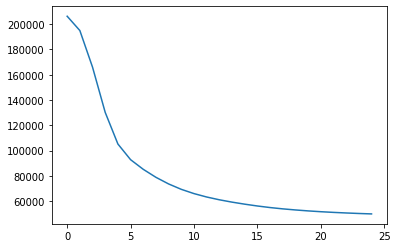

In [29]:
plt.plot(history.history['loss'])

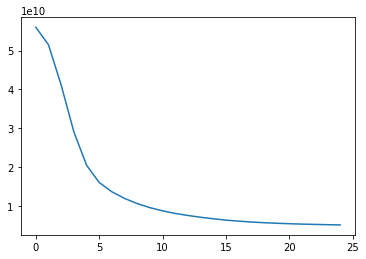

In [30]:
plt.plot(history.history['mse'])

In [31]:
ypred=model.predict(sc_test)

In [32]:
#Evaluation of model on testing data
model.evaluate(sc_test,ytest)

94/94 [==============================] - 0s 1ms/step - loss: 49394.4258 - mse: 5088572928.0000


[49394.42578125, 5088572928.0]

In [33]:
pd.DataFrame({"Actual":np.array(ytest).flatten(),"Predicted":ypred.flatten()})

,Actual,Predicted
0,344700.0,348989.750000
1,176500.0,201875.046875
2,270500.0,278318.312500
3,330000.0,309939.218750
4,81700.0,100134.593750
...,...,...
2995,225000.0,127803.718750
2996,237200.0,164967.296875
2997,62000.0,70850.445312
2998,162500.0,154619.781250
